<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

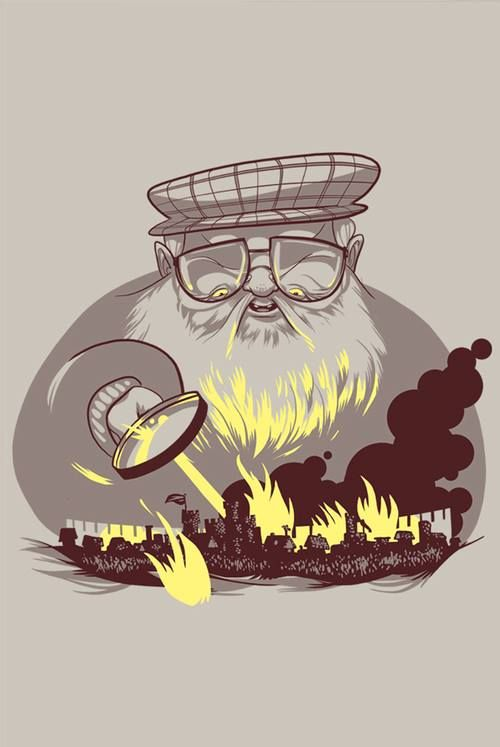

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [289]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test.csv
100% 38.3k/38.3k [00:00<00:00, 43.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train.csv
100% 141k/141k [00:00<00:00, 17.7MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [504]:
data = pd.read_csv('game_of_thrones_train.csv', index_col="S.No")
data.shape

(1557, 26)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<Axes: ylabel='S.No'>

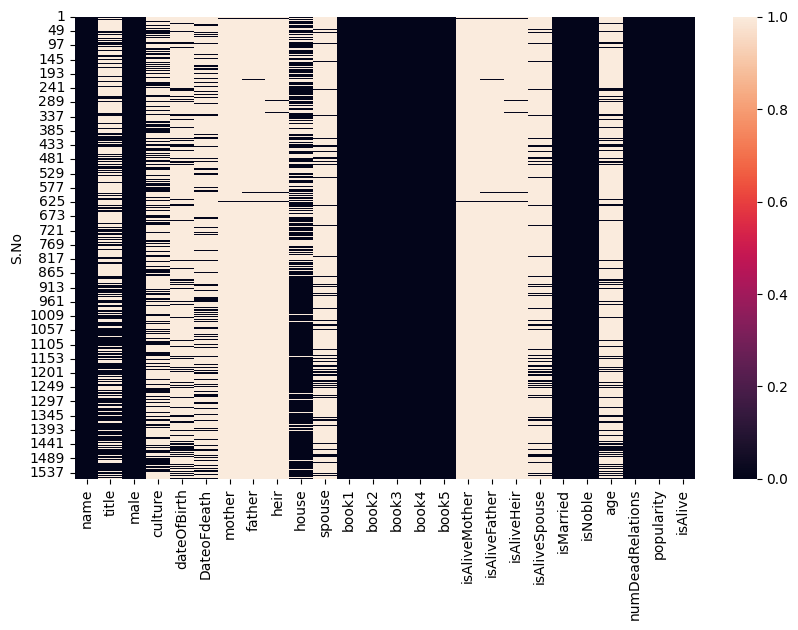

In [505]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=True)

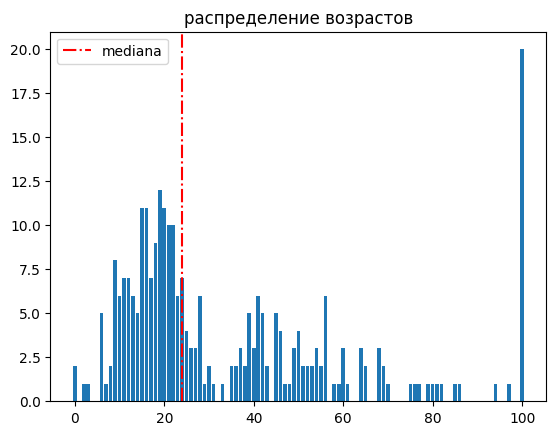

In [506]:
age_vc = data["age"].value_counts()
plt.bar(age_vc.keys(), age_vc.values);
plt.axvline(data["age"].median(), linestyle='-.',c='r', label='mediana')
plt.title('распределение возрастов')
plt.legend();

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       307 non-null    float64
 6   mother            18 non-null     object 
 7   father            22 non-null     object 
 8   heir              21 non-null     object 
 9   house             1176 non-null   object 
 10  spouse            200 non-null    object 
 11  book1             1557 non-null   int64  
 12  book2             1557 non-null   int64  
 13  book3             1557 non-null   int64  
 14  book4             1557 non-null   int64  
 15  book5             1557 non-null   int64  
 16  isAliveMother     18 non-null     float64
 17  

In [508]:
data.describe()

,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,307.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,1231.785016,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,17010.068902,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,258.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


In [509]:
#data = pd.read_csv('game_of_thrones_train.csv', index_col="S.No")
data["age"] = data["age"].fillna(data["age"].median())
# data["title"] = data["title"].fillna(0)
# data["title"] = (data['title'] != 0).astype(int)
data.loc[data['DateoFdeath'] > -9999, 'DateoFdeath'] = 1
data['DateoFdeath'] = data['DateoFdeath'].fillna(0)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [510]:
data['isPopular'] = (data['popularity'] > 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

In [511]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [512]:
data.drop(columns=['numDeadRelations', 'popularity', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'name', 'spouse','dateOfBirth'], inplace = True)
data.head()

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,NaN,1,NaN,0.0,NaN,0,0,0,0,0,0,0,24.0,0,1,1
2,Lord of the Crossing,1,Rivermen,0.0,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,Ser,1,NaN,0.0,House Swyft,0,0,0,1,0,0,1,24.0,1,0,0
4,Queen,0,NaN,1.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0
5,Greenstone,0,Dornish,0.0,House Santagar,0,0,0,1,0,1,1,29.0,1,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [513]:
data['isAlive'].unique() #catgorial

array([0, 1])

In [514]:
data['isAlive'].value_counts() #сбалансированный

,count
isAlive,
1,1212
0,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

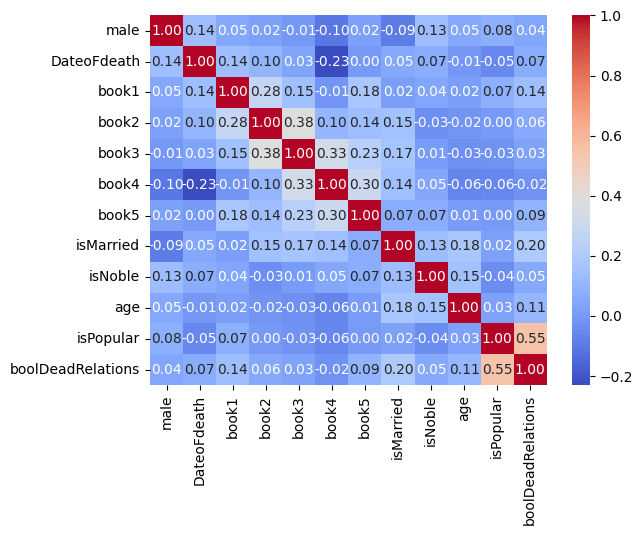

In [515]:
sns.heatmap(data.drop(columns=['title', 'culture', 'house','isAlive']).corr(), annot=True, cmap='coolwarm', fmt='.2f'); #нормально

In [516]:
from sklearn.preprocessing import LabelEncoder

label_encoder_house = LabelEncoder()
data['Category_house'] = label_encoder_house.fit_transform(data['house'])

label_encoder_title = LabelEncoder()
data['Category_title'] = label_encoder_title.fit_transform(data['title'])

df_one_hot = pd.get_dummies(data, columns=['culture'], prefix='culture')

label_encoder_culture = LabelEncoder()
data['Category_culture'] = label_encoder_culture.fit_transform(data['culture'])

# house_mapping = dict(zip(label_encoder_house.classes_, range(len(label_encoder_house.classes_))))

data_train_columns = df_one_hot.drop(columns=['title', 'house', 'isAlive']).columns

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

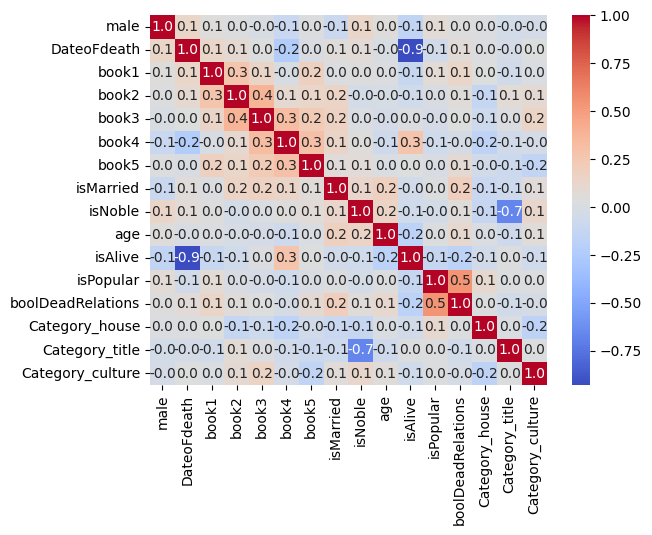

In [517]:
sns.heatmap(data.drop(columns=['title', 'house', 'culture']).corr(), annot=True, cmap='coolwarm', fmt='.1f'); #DateoFdeath чильно коррелирует

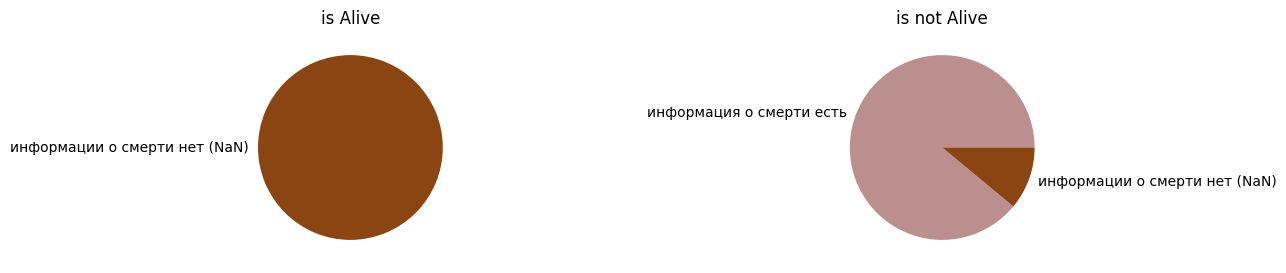

In [518]:
high_corr_feature_alive = data.loc[data['isAlive']==1, 'DateoFdeath'].value_counts() #у тех кто выжил нет инфы о дате смерти
high_corr_feature_died = data.loc[data['isAlive']==0, 'DateoFdeath'].value_counts()
labels = ['информация о смерти есть', 'информации о смерти нет (NaN)']
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,3))
ax1.pie(high_corr_feature_alive.values,labels=['информации о смерти нет (NaN)'], colors=['saddlebrown'])
ax2.pie(high_corr_feature_died.values, labels=labels, colors=['rosybrown', 'saddlebrown'])

ax1.set_title('is Alive')
ax2.set_title('is not Alive')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [519]:
X = df_one_hot.drop(columns=['title', 'house', 'isAlive'])
y = df_one_hot['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [520]:
from sklearn.model_selection import train_test_split

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [522]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [523]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [524]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_logreg = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [525]:
AdaBoostClassifier_model = AdaBoostClassifier()
AdaBoostClassifier_model.fit(X_train, y_train)
y_pred_AdaBoostClassifier = AdaBoostClassifier_model.predict(X_test)

RandomForestClassifier_model = RandomForestClassifier()
RandomForestClassifier_model.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier_model.predict(X_test)

GaussianProcessClassifier_model = GaussianProcessClassifier()
GaussianProcessClassifier_model.fit(X_train, y_train)
y_pred_GaussianProcessClassifier = GaussianProcessClassifier_model.predict(X_test)

GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train, y_train)
y_pred_GaussianNB = GaussianNB_model.predict(X_test)

KNeighborsClassifier_model = KNeighborsClassifier()
KNeighborsClassifier_model.fit(X_train, y_train)
y_pred_KNeighborsClassifier = KNeighborsClassifier_model.predict(X_test)

SVC_model = SVC()
SVC_model.fit(X_train, y_train)
y_pred_SVC = SVC_model.predict(X_test)

DecisionTreeClassifier_model = DecisionTreeClassifier()
DecisionTreeClassifier_model.fit(X_train, y_train)
y_pred_DecisionTreeClassifier = DecisionTreeClassifier_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [526]:
from sklearn.metrics import accuracy_score

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [527]:
pred_list = [y_pred_AdaBoostClassifier, y_pred_RandomForestClassifier, y_pred_GaussianProcessClassifier,
             y_pred_GaussianNB, y_pred_KNeighborsClassifier, y_pred_SVC, y_pred_DecisionTreeClassifier]
for pred in pred_list:
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy: %.4f" % accuracy) #лучашя модель - AdaBoostClassifier_model или RandomForestClassifier_model

Accuracy: 0.9957
Accuracy: 0.9957
Accuracy: 0.8013
Accuracy: 0.2799
Accuracy: 0.8526
Accuracy: 0.7778
Accuracy: 0.9957


In [528]:
AdaBoostClassifier_model_trainpred = AdaBoostClassifier_model.predict(X_train)
RandomForestClassifier_model_trainpred = RandomForestClassifier_model.predict(X_train)
DecisionTreeClassifier_model_trainpred = DecisionTreeClassifier_model.predict(X_train)
accuracy_score(y_train, AdaBoostClassifier_model_trainpred), accuracy_score(y_train, RandomForestClassifier_model_trainpred), accuracy_score(y_train, DecisionTreeClassifier_model_trainpred)
#даже результаты на трейне одинаковые

(0.9963269054178145, 0.9963269054178145, 0.9963269054178145)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [529]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.9MB/s]


In [530]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

Преобразую тестовую выборку так же как преобразвывал трейновую

In [531]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
data = data_test
data["age"] = data["age"].fillna(data["age"].median())
data.loc[data['DateoFdeath'] > -9999, 'DateoFdeath'] = 1
data['DateoFdeath'] = data['DateoFdeath'].fillna(0)
data['isPopular'] = (data['popularity'] > 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
data.drop(columns=['numDeadRelations', 'popularity', 'mother', 'father', 'heir', 'isAliveMother', 'isAliveFather',
                   'isAliveHeir', 'isAliveSpouse', 'name', 'spouse','dateOfBirth'], inplace = True)

def transform_with_unknown(data, encoder):
    return [encoder.transform([x])[0] if x in encoder.classes_ else encoder.transform(['unknown'])[0] for x in data]

label_encoder_house.classes_ = np.append(label_encoder_house.classes_, 'unknown')
data['Category_house'] = transform_with_unknown(data['house'], label_encoder_house)


label_encoder_title.classes_ = np.append(label_encoder_title.classes_, 'unknown')
data['Category_title'] = transform_with_unknown(data['title'], label_encoder_house)

df_one_hot = pd.get_dummies(data, columns=['culture'], prefix='culture')

test_encoded = df_one_hot.reindex(columns=data_train_columns, fill_value=0)

In [532]:
test_encoded.head(3)

,male,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_free folk,culture_ironborn,culture_northmen,culture_westermen
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0.0,0,0,0,0,1,0,0,100.0,...,False,False,False,False,False,False,0,0,0,0
1559,0,0.0,0,1,1,1,1,0,0,32.0,...,False,False,False,False,False,False,0,0,0,0
1560,0,0.0,0,0,1,1,0,0,0,32.0,...,False,False,False,False,False,False,0,0,0,0


In [533]:
data_train_columns.shape

(65,)

In [534]:
pred_test = RandomForestClassifier_model.predict(test_encoded)
pred_test.shape

(389,)

In [535]:
set(test_encoded.columns)-set(data_train_columns)

set()

In [536]:
submission['isAlive'] = pred_test

In [538]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,0
1943,0
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [539]:
submission.to_csv("/content/new_submission.csv", index=False)